In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

<Token var=<ContextVar name='format_options' default={'edgeitems': 3, 'threshold': 1000, 'floatmode': 'maxprec', 'precision': 8, 'suppress': False, 'linewidth': 75, 'nanstr': 'nan', 'infstr': 'inf', 'sign': '-', 'formatter': None, 'legacy': 9223372036854775807, 'override_repr': None} at 0x000002AEFCE36CF0> at 0x000002AE9C0DC380>

# What is a model?

A mathematical model is an idealization of a real-world system. Once we have a model we can use techniques to implement this model in a computer to derive the corresponding computational model and thus perform a simulation.

The three types of methods that are used for modeling are: 

1. Graphical
2. Numerical
3. Analytical

**Graphical** methods apply visualization of the data to help understand the data. Various types of graphs can be used; the most common one is the line graph.

**Numerical** methods directly manipulate the data of the problem to compute various quantities of interest, such as the average change of the population size in a year.
 
**Analytical** methods use various forms of relations and equations to allow computation of the various quantities of interest. For example, an equation can be derived that defines how to compute the population size for any given year. 

Each method has its advantages and limitations. 

The three methods complement each other and are normally used in modeling.

# Simple models

---

#### Analytical models


In [2]:
x = np.arange(0, 10, 0.1)   # independent variable

y = x      # linear model
y2 = x**2  # quadratic model
y3 = x**3  # cubic model
y2x = 2**x  # exponential model (base 2)
yexp = np.exp(x)  # exponential model (base e)

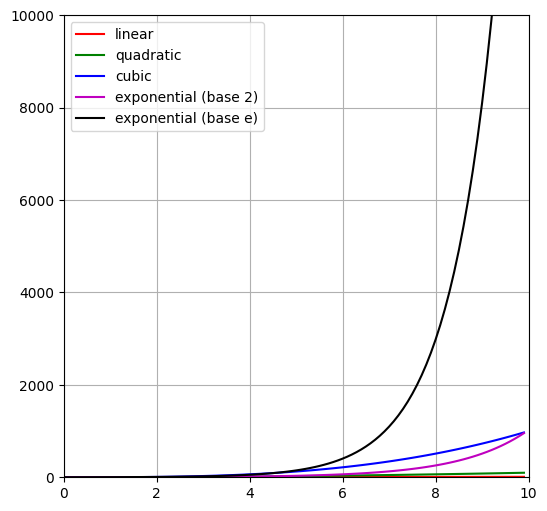

In [3]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(x,y,    'r', label='linear')
ax.plot(x,y2,   'g', label='quadratic')
ax.plot(x,y3,   'b', label='cubic')
ax.plot(x,y2x,  'm', label='exponential (base 2)')
ax.plot(x,yexp, 'k', label='exponential (base e)')
ax.set_xlim([0,10])
ax.set_ylim([0,10000])
ax.legend()
ax.grid()

###  Linear models

Consider the changes in electric energy price in a year, given the average monthly price. We have data containing the values of average retail price of electricity for the state of Georgia. 

__Note: this file, electricity.dat,  is in course website under Data__

The data given corresponds to the price of electric power that has been recorded every month for 12 months. 

In [4]:
!cat '../../data/electricity.dat'

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
# We will use Numpy's genfromtxt() function to read file

filename = 'data/electricity.dat'

data = np.genfromtxt(filename, skip_header=1, delimiter=",")  # returns an NDarray

print(data)

FileNotFoundError: data/electricity.dat not found.

This is an example of reading the same data using the Python way
```python
data = list()

line_count = 0
with open('data/electricity.dat') as file_obj:
    next(file_obj)  # skip first line
    for line in file_obj:
        data.append(line.split(',')[1].strip())
        line_count += 1
        
print(f'Processed {line_count} lines.')
print(data)
```

---

In [ ]:
# average monthly price of electric energy in cents per kW-h
e = np.array(data, dtype='float')
print(e)

[[ 1.   10.22]
 [ 2.   10.36]
 [ 3.   10.49]
 [ 4.   10.6 ]
 [ 5.   10.68]
 [ 6.   10.8 ]
 [ 7.   10.88]
 [ 8.   10.94]
 [ 9.   11.05]
 [10.   11.15]
 [11.   11.26]
 [12.   11.4 ]]


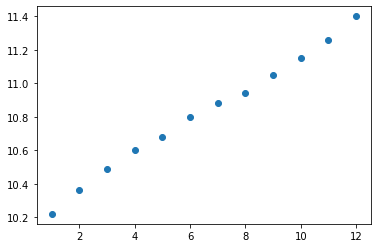

In [ ]:
plt.scatter(e[:,0], e[:,1])  # note use of slicing

This is an example of *discrete* data

#### Types of discrete data

* Quantitative variables with relatively few values (example above)
* Nominal (e.g., gender, political affiliation)
* Ordinal (e.g., school letter grades)


#### Model formulation

How does the data "behave"?

* "Obviously" the values are increasing.
* How can we measure the rate of increase?
    
One reasonable assumption is that the quantities in the list increase at a **constant rate**. This means the increment is assumed to be fixed. 

More generally, if the property is denoted by $x$ and the increment is denoted by $\Delta x$ then

\begin{equation}
\Delta x = x_n - x_{n-1}
\end{equation}

or

\begin{equation}
x_n = x_{n-1}+\Delta x
\end{equation}

or 

\begin{equation}
x_{n+1} = x_{n}+\Delta x
\end{equation}

Such an equation is known as a *difference* equation (or *recurrence relation*).

Difference equations are well suited for computer programming!

If all increments ($\Delta x$) are equal then model exhibits **arithmetic growth** and it is called a **linear model**

We can now apply the linear model for the monthly average price of electric energy, given the collection of monthly recorded energy price in cents per kW-h of those 12 months. Thus:

\begin{equation}
e_n = e_{n-1}+\Delta e
\end{equation}

The initial value of energy price, prior to the first month of consumption, is denoted by $e_0$, and it normally corresponds to the energy price of a month from the previous year, i.e.,

\begin{equation}
e_1 = e_{0}+\Delta e
\end{equation}

A more useful formulation of the linear model is the following:

\begin{equation}
e_n = e_{0}+n\Delta e
\end{equation}

where $n=0,1,2,3...$, $e_{0}$ is the initial condition and $\Delta e$ is called a model _parameter_.

In modeling we often want to estimate the model _parameters_.

So, we need to determine $\Delta e$.

#### Simulation

In [ ]:
e[:,1]

array([10.22, 10.36, 10.49, 10.6 , 10.68, 10.8 , 10.88, 10.94, 11.05,
       11.15, 11.26, 11.4 ])

In [ ]:
# diff, computes the differences of a sequence of data values.
de = np.diff(e[:,1])

In [ ]:
# differences in array e
de

array([0.14, 0.13, 0.11, 0.08, 0.12, 0.08, 0.06, 0.11, 0.1 , 0.11, 0.14])

To compute the average value of the increments in price of electric energy in the year we can use the general expression for calculating average:

\begin{equation}
\Delta e = \frac{1}{n}\sum_{i=1}^{i=n}de_i
\end{equation}


In [ ]:
# model parameter
delta_e = np.mean(de)
delta_e

0.10727272727272724

In [ ]:
N = 12  # 12 months
e_pred = np.zeros(N)  # prediction - actually, the model

e_pred[0] = e[0,1]  # initial condition

for m in range(1, N):
    e_pred[m] = e_pred[m-1] + delta_e
    #e_pred[m] = e_pred[0] + delta_e*m

print(e_pred)

[10.22   10.3273 10.4345 10.5418 10.6491 10.7564 10.8636 10.9709 11.0782
 11.1855 11.2927 11.4   ]


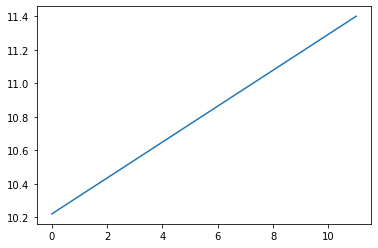

In [ ]:
plt.plot(e_pred)

In [ ]:
for j in range(N):
    perc_error = (abs(e[j,1]-e_pred[j])/e[j,1])*100
    print(f"{j+1:3d}, {e[j,1]:.2f} , {e_pred[j]:.2f}, {perc_error:.2f}%")

  1, 10.22 , 10.22, 0.00%
  2, 10.36 , 10.33, 0.32%
  3, 10.49 , 10.43, 0.53%
  4, 10.60 , 10.54, 0.55%
  5, 10.68 , 10.65, 0.29%
  6, 10.80 , 10.76, 0.40%
  7, 10.88 , 10.86, 0.15%
  8, 10.94 , 10.97, 0.28%
  9, 11.05 , 11.08, 0.26%
 10, 11.15 , 11.19, 0.32%
 11, 11.26 , 11.29, 0.29%
 12, 11.40 , 11.40, 0.00%


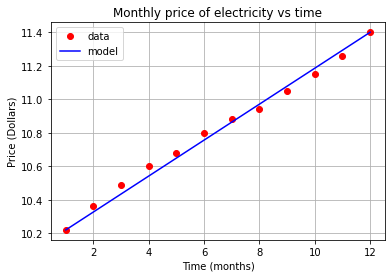

In [ ]:
fig, ax = plt.subplots()
ax.plot(e[:,0], e[:,1],'ro', label='data')
ax.plot(e[:,0], e_pred,'b' , label='model');
ax.set_title('Monthly price of electricity vs time')
ax.set_xlabel('Time (months)')
ax.set_ylabel('Price (Dollars)')
ax.legend()
ax.grid()

**Validation** of a model is the analysis that compares the values computed with the model with the actual values given. For example, starting with the first value of the monthly consumption of electric energy, the model is used to compute the rest of the monthly values of consumption. These values can then be compared to the values given.

If the corresponding values are close enough, the model is considered a reasonable **approximation** to the real system.

---

#### Fitting data with Scipy

We have talked about the Numpy and Matplotlib libraries, but there is a third library that is invaluable for Scientific Analysis: __Scipy__. 

Scipy is basically a very large library of functions that you can use for scientific analysis. A good place to start to find out about the top-level scientific functionality in Scipy is the http://docs.scipy.org/doc/scipy/reference/.

Examples of the functionality include:

* Integration (scipy.integrate)
* Optimization/Fitting (scipy.optimize)
* Interpolation (scipy.interpolate)
* Fourier Transforms (scipy.fftpack)
* Signal Processing (scipy.signal)
* Linear Algebra (scipy.linalg)
* Spatial data structures and algorithms (scipy.spatial)
* Statistics (scipy.stats)
* Multi-dimensional image processing (scipy.ndimage)
and so on.


In [ ]:
from scipy.optimize import curve_fit

In [ ]:
#help(curve_fit)

In [ ]:
# we want to determine the slope and intercept of the best-fit line to the data.

# We start off by definining a function representing the model - a line:

def my_line(x, a, b):
    return a * x + b   

popt, pcov = curve_fit(my_line, e[:,0], e[:,1])
print(popt)

[ 0.1007 10.1644]


Consider data that exhibits growth in such a way that in equal intervals of time, the data increase by an equal percentage or factor.


### Geometric Growth

The population of a small town is recorded every year; the increases per year are shown below, which gives the data about the population during the years from 1995 to 2003.

population = 81.0, 90.0, 130.0, 175.0, 206.0, 255.0, 288.0, 394.0, 520.0

year = 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003

In [ ]:
# population list
pop_list = [81.0, 90.0, 130.0, 175.0, 206.0, 255.0, 288.0, 394.0, 520.0]

pop_data = np.array(pop_list) # NDarray

print(pop_data)

[ 81.  90. 130. 175. 206. 255. 288. 394. 520.]


In [ ]:
# yr array, 
yr = np.array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003])

# is there a better way to do this?

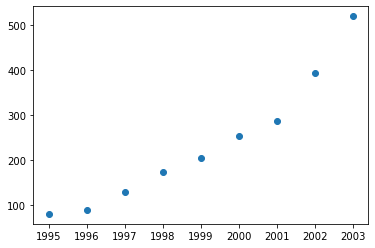

In [ ]:
plt.scatter(yr, pop_data)

#### Model formulation

It looks like the population growth is not linear. We need another model.

_We know_ that with **geometric growth**, the data increase (or decrease) by an equal percentage or **growth factor** in equal intervals of time. That is

\begin{equation}
r = \frac{x_{1} }{x_{0}}
\end{equation}


The difference equation that represents a pattern of geometric growth has the general form:

\begin{equation}
x_{n+1} = r x_{n}
\end{equation}

where $n+1$ is new value, $n$ is the current value and the __parameter__ $r$ is constant and represents the growth factor. 

With geometric growth, the data increases or decreases by a fixed factor in equal intervals.


Note that from 

\begin{equation}
x_{n+1} = r x_{n}
\end{equation}

we can write a few terms of sequence $x$ and show that

\begin{equation}
x_{n+1} = r^{n} x_0
\end{equation}

This is is an example of an exponential function because the independent variable, $n$, is the exponent.

The above expression can be used to answer additional questions about the model. 

For example: what will the population be 12 years from now? 

#### Notes:

The data in a sequence will successively increase in value when __r > 1__, i.e. the growth factor is greater than 1. This type of growth is known as *exponential growth*.


The data in a sequence will successively decrease in value when __0 < r < 1__, i.e. the growth factor is less than 1. This type of growth is known as *exponential decay*.

#### Simulation

In [ ]:
def factors(array): # Compute factors in array
    n = array.size
    facs = np.zeros(n-1) # array of factors
    for j in range(n-1):
        facs[j] = array[j+1]/array[j]
    return facs

In [ ]:
r = factors(pop_data)
print('Factors (>1): ',r)

Factors (>1):  [1.1111 1.4444 1.3462 1.1771 1.2379 1.1294 1.3681 1.3198]


In [ ]:
meanr = np.mean(r)
print(f'Mean of r: {meanr:.2f}')

Mean of r: 1.27


In [ ]:
# population growth model

N = yr.size # number of data points

prediction = np.zeros(N)
prediction[0] = pop_data[0] # initial condition

for j in range(N-1):
    prediction[j+1] = meanr * prediction[j]
    #prediction[j+1] = prediction[0] * meanr**(j+1)
    
# Data
print('   Yr\tData\t Prediction')
for j in range(N):
    print(f"{yr[j]:5d}  {pop_data[j]:2f}   {prediction[j]:2f}")

   Yr	Data	 Prediction
 1995  81.000000   81.000000
 1996  90.000000   102.606554
 1997  130.000000   129.976603
 1998  175.000000   164.647547
 1999  206.000000   208.566881
 2000  255.000000   264.201591
 2001  288.000000   334.676725
 2002  394.000000   423.950931
 2003  520.000000   537.038814


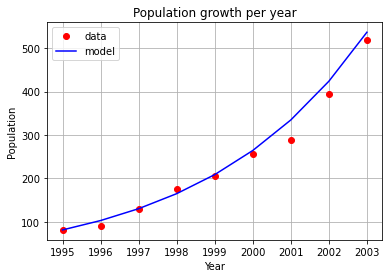

In [ ]:
fig, ax = plt.subplots()
ax.plot(yr, pop_data,'ro', label='data')
ax.plot(yr, prediction,'b', label='model');
ax.set_title('Population growth per year')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.legend()
ax.grid()

In [ ]:
# We want to determine the model parameters a and b.

# We start off by definining a function representing the model - an exponential:

x = range(1, N+1)

def exp_func(t, a, b):
    return a * np.exp(b*t)

# coefficients and curve fit for curve, note use of x
popt, pcov = curve_fit(exp_func, x, pop_data)

print("Model parameters:  {:.2f}, {:.2f} ".format(popt[0], popt[1]))

pop_fit = exp_func(x, popt[0], popt[1]) 

# or simply:
# pop_fit = exp_func(x, *popt) # note use of *popt

Model parameters:  62.00, 0.23 


NameError: name 'pop_fit' is not defined

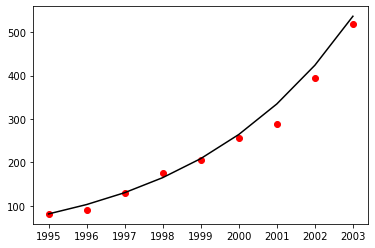

In [ ]:
fig, ax = plt.subplots()
ax.plot(yr, pop_data,'ro', label='data')
ax.plot(yr, prediction,'k', label='our model');
ax.plot(yr, pop_fit,'b', label='scipy');
ax.set_title('Population growth per year')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.legend()
ax.grid()

### Population decay

In [ ]:
# reverse list order - to simulate decreasing population
pop_list.reverse()  # reversing" is done "in place

pop_data_rev = np.array(pop_list)
print(pop_data_rev)

[520. 394. 288. 255. 206. 175. 130.  90.  81.]


In [ ]:
N = 9 # number of data points

rr = factors(pop_data_rev)  # using reversed population list
print('Factors (<1): ',rr)

meanrr = np.mean(rr) # population decay
print(f'Mean of rr: {meanrr:.2f}')


prediction = np.zeros(N)
prediction[0] = pop_data_rev[0] # initial condition

for j in range(N-1):
    prediction[j+1] = meanrr * prediction[j]
    #prediction[j+1] = prediction[0]* meanrr**(j+1)
    
# Data
print('   Yr\tData\t Prediction')
for j in range(N):
    print(f"{yr[j]:5d}, {pop_data_rev[j]:2f} , {prediction[j]:2f}")

Factors (<1):  [0.7577 0.731  0.8854 0.8078 0.8495 0.7429 0.6923 0.9   ]
Mean of rr: 0.80
   Yr	Data	 Prediction
 1995, 520.000000 , 520.000000
 1996, 394.000000 , 413.828738
 1997, 288.000000 , 329.335048
 1998, 255.000000 , 262.092899
 1999, 206.000000 , 208.579949
 2000, 175.000000 , 165.993033
 2001, 130.000000 , 132.101322
 2002, 90.000000 , 105.129468
 2003, 81.000000 , 83.664606


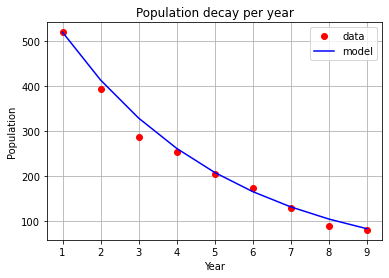

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,pop_data_rev,'ro', label='data')
ax.plot(x,prediction,'b', label='model');
ax.set_title('Population decay per year')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.legend()
ax.grid()

## Summary

* A computational model is a computer implementation of a mathematical model. 
* Considering simplifying assumptions and using abstraction are important steps in formulating a mathematical model. 
* Simple mathematical techniques such as difference equations are used. 
* In arithmetic growth models, the values of the differences of the data is constant - model is linear
* In geometric growth models, the data increases (or decreases) with a constant growth factor - model is exponential
* Some important applications involving computational models with geometric growth are pollution control, human drug treatment, population growth and radioactive decay.